In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cns

In [3]:
N=3 #number of flavors
E= 1e8 #eV This is the total energy of neutrino

## Parameters for Neutrino Oscillations

In [4]:
theta12=np.radians(33.41) # Coupling angles
theta23=np.radians(49.1)
theta13=np.radians(8.54)
deltaCP=np.radians(197)

delm12sq=0.759e-4 #eV^2
delm32sq=23.2e-4 #eV^2
delm13sq=23.2e-4 #eV^2

m1=0 #eV
m2=np.sqrt(m1**2+delm12sq)
m3=np.sqrt(m1**2+delm13sq)

## Defining the PMNS matrix

In [5]:
def rot2D(q):
    return np.array([[np.cos(q), np.sin(q)], [-np.sin(q), np.cos(q)]])
U=np.identity(3, dtype=np.complex128)
angles=[theta23, theta13, theta12]
for i in range(N):
    Ui=np.zeros([N,N], dtype=np.complex128)
    Ui[i,i]=1
    for j in range(1,N):
        for k in range(1,N):
            Ui[(i+j)%N, (i+k)%N]=rot2D(angles[i])[j-1,k-1]
    if i==1:
        Ui[2,0]*=np.exp(1j*deltaCP)
        Ui[0,2]*=np.exp(-1j*deltaCP)
    U=np.matmul(U, Ui)
Uinv=np.linalg.inv(U)

In [6]:
modU=np.zeros([N,N])
for i in range(N):
    for j in range(N):
        modU[i,j]=np.abs(U[i,j])

In [7]:
ini_flavor=np.array([1,0,0])
ini_mass=np.matmul(Uinv, ini_flavor)

In [8]:
tmin=0
tmax=1.2e-2#s
tpts=1000
ts=np.linspace(tmin, tmax, tpts)
c=cns.elementary_charge/cns.hbar

In [9]:
H=np.diag([m1**2, m2**2, m3**2])/(2*E)

In [10]:
psi_mass=np.zeros([N, tpts], dtype=np.complex128)
psisq_flavor=np.zeros([N, tpts], dtype=np.complex128)
psi_flavor=np.zeros([N, tpts])
for n in range(tpts):
    for i in range(N):
        psi_mass[i, n]=ini_mass[i]*np.exp(-1j*c*ts[n]*H[i,i])
    psi_flavor[:,n]=np.matmul(U, psi_mass[:,n])
    for i in range(N):
        psisq_flavor[i,n]=np.abs(psi_flavor[i,n])**2

C:\Users\soura\AppData\Local\Temp\ipykernel_27148\1802736740.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  psi_flavor[:,n]=np.matmul(U, psi_mass[:,n])


c:\Users\soura\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


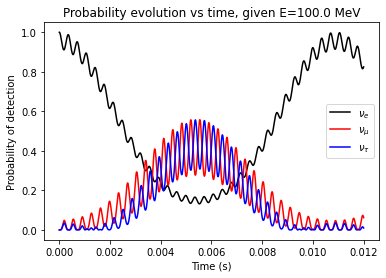

In [11]:
LE=(ts*cns.speed_of_light/1e3)/(E/1e9)
flavors=[r'$\nu_e$', r'$\nu_{\mu}$', r'$\nu_{\tau}$']
colors=['k', 'r', 'b']
for i in range(N):
    plt.plot(ts, psisq_flavor[i,:], label=flavors[i], c=colors[i])
plt.xlabel('Time (s)')
plt.ylabel('Probability of detection')
plt.legend()
plt.title('Probability evolution vs time, given E={} MeV'.format(E/10**6))
plt.savefig('time_evol.png', dpi=400)

In [12]:
p_avg=np.mean(psisq_flavor, 1).real
p_avg

array([0.54648032, 0.1650479 , 0.13860183])

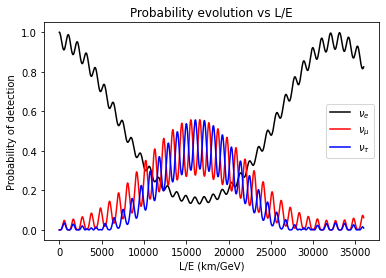

In [13]:
for i in range(N):
    plt.plot(LE, psisq_flavor[i,:], label=flavors[i], c=colors[i])
plt.xlabel('L/E (km/GeV)')
plt.ylabel('Probability of detection')
plt.legend()
plt.title('Probability evolution vs L/E')
plt.savefig('neutrino_oscillation_from_e.png', dpi=300)

In [ ]:
rho=0